# Comparing the Hinge and Logistic Loss Functions

**EE514: Data Analysis and Machine Learning**

[Kevin McGuinness](http://www.eeng.dcu.ie/~mcguinne/), School of Electronic Engineering, Dublin City University

---

The soft margin linear SVM effectively uses a hinge loss function. Here we plot what this looks like and compare it to the logistic loss that is used by logistic regresssion


In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import seaborn as sns
sns.set_style('white')

## Define loss functions

Each of these functions takes a parameter `yf` which is the product of the ground truth $y \in \{-1, +1\}$ and the model predictions $\hat{y} = f(x)$. 

Notice that when the `yf` is **positive** when the prediction has the same sign as the ground truth and **negative** otherwise.

In [ ]:
def hinge_loss(yf):
    return np.maximum(0, 1 - yf)

def logistic_loss(yf):
    """Logistic loss is a reparameterization of cross entropy assuming a sigmoid activation func"""
    return np.log(1.0 + np.exp(-yf)) / np.log(2.0)

def step_loss(yf):
    return np.where(yf < 0, 1, 0)

### Aside: logistic loss from cross entropy

To see how to get the logistic loss by reparameterizing cross entropy, let's look at the standard cross entropy function:

$$L(y, \hat{y}) =  -y\log \hat{y} - (1-y)\log 1-\hat{y}$$

Notice that this can be rewritten as:
$$L(y, \hat{y}) = \begin{cases} 
      -\log\hat{y} & \text{if} y = 0 \\
      -\log\left(1 - \hat{y}\right) & \text{if} y = 1
\end{cases}$$ 

Let $$\hat{y} = \frac{1}{1+e^{-f(x)}}.$$ Then we have that:
$$-\log\hat{y} = \log\left(1+e^{-f(x)}\right),$$ And similarly $$ -\log(1-\hat{y}) =  \log\left(1+e^{+f(x)}\right).$$ Reparameterizing so that $y$ is now $\{+1, -1\}$ instead of $\{0, 1\}$ we have
$$L(y, f(x)) = \begin{cases} 
      \log\left(1+e^{-f(x)}\right) & \text{if} y = +1 \\
      \log\left(1+e^{+f(x)}\right) & \text{if} y = -1
\end{cases}$$ 
which can be written more succinctly as: $$\log\left(1+e^{-yf(x)}\right),$$ which is the logistic loss (the extra $\log(2)$ comes out if you include the fact that the decision boundary for the SVM is at 0 instead of 0.5)



## Plot the loss functions

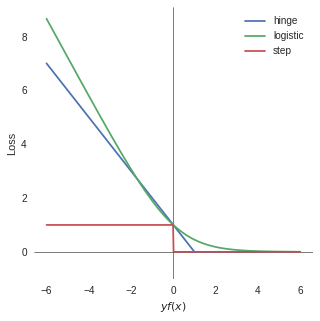

In [ ]:
yf = np.linspace(-6, 6, 500)
h = hinge_loss(yf)
l = logistic_loss(yf)
s = step_loss(yf)

figure(figsize=(5,5))
axhline(0, lw=0.5, color='black')
axvline(0, lw=0.5, color='black')
plot(yf, h, label='hinge')
plot(yf, l, label='logistic')
plot(yf, s, label='step')
ylim(-1)
legend()
xlabel('$y f(x)$')
ylabel('Loss')
sns.despine(top=True, left=True, bottom=True, right=True)

Notice that:
- The hinge loss gives a lower penalty than the logistic for badly misclassified examples. This means it is a little more robust to noise in the target values (e.g. mislabelled examples);
- The logistic loss penalizes correct examples more: even if the example is classified correctly ($p > 0.5$), the logistic loss encourages the classifier to produce more confident predictions. The hinge loss does not do this: the  loss is zero if the example is outside the margin. This means that examples that are far from the decision boundary do not affect it.
- Both the logistic and hinge loss coincide with the step loss at $y f(x)=0$ but are differentiable. The logistic loss is also smooth but the hinge loss has a kink at $y f(x)=1$.